# Neural Netwark - TD 4 Regularization

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1

# Overfitting and Underfitting

## Exercice 1 Load IMDB

In [2]:
(train_data_1, train_labels_1), (test_data_1, test_labels_1) = keras.datasets.imdb.load_data(num_words = 10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\julie\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\julie\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

## Exercice 2 - Prepare the data

In [3]:
print("train_data size:",train_data_1.size, "test_data size:",test_data_1.size)
print("train_labels size:",train_labels_1.size, "test_labels size:",test_labels_1.size)

print("train_data shape:",train_data_1.shape, "test_data shape:",test_data_1.shape)
print("train_labels shape:",train_labels_1.shape, "test_labels shape:",test_labels_1.shape)

train_data size: 25000 test_data size: 25000
train_labels size: 25000 test_labels size: 25000
train_data shape: (25000,) test_data shape: (25000,)
train_labels shape: (25000,) test_labels shape: (25000,)


In [4]:
def vectorize_sequences ( sequences , dimension =10000) :
    # Create an all - zero matrix of shape ( len ( sequences ), dimension)
    results = np . zeros (( len ( sequences ) , dimension ))
    for i , sequence in enumerate ( sequences ):
        results[i , sequence ] = 1. # set specific indices ofresults [i] to 1s
    return results


# Our vectorized training data
x_train_1 = vectorize_sequences(train_data_1)
# Our vectorized test data
x_test_1 = vectorize_sequences(test_data_1)
# Our vectorized labels
y_train_1 = np.asarray(train_labels_1).astype ('float32')
y_test_1 = np.asarray(test_labels_1).astype('float32')

##### check new train and test sets shapes and sizes. What have changed?

In [5]:
print("x_train size:",x_train_1.size, "x_test size:",x_test_1.size)
print("y_train size:",y_train_1.size, "y_test size:",y_test_1.size)

print("x_train shape:",x_train_1.shape, "x_test size:",x_test_1.shape)
print("y_train shape:",y_train_1.shape, "y_test size:",y_test_1.shape)

x_train size: 250000000 x_test size: 250000000
y_train size: 25000 y_test size: 25000
x_train shape: (25000, 10000) x_test size: (25000, 10000)
y_train shape: (25000,) y_test size: (25000,)


## Exercice 3 - Reducing the network size. Original model

In [6]:
original_model = keras.models.Sequential()

original_model.add(keras.layers.Dense(16, activation = 'relu'))
original_model.add(keras.layers.Dense(16, activation = 'relu'))
original_model.add(keras.layers.Dense(1, activation = 'sigmoid'))

original_model.compile(optimizer='rmsprop',
                        loss = 'binary_crossentropy', 
                        metrics=['acc'])

## Exercice 4 - Smaller_model

### Smaller_model with two dense layers of size 4 and each followed with an activation function relu. 
### Add a final layer of 1 node and an activation function of sigmoid. For your network compilation, define a rmsprop optimizer, with a binary crossentropy and acc as the metric

In [7]:
smaller_model = keras.models.Sequential()

smaller_model.add(keras.layers.Dense(4, activation = 'relu'))
smaller_model.add(keras.layers.Dense(4, activation = 'relu'))
smaller_model.add(keras.layers.Dense(1, activation = 'sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                        loss = 'binary_crossentropy', 
                        metrics=['acc'])

## Exercice 5 - Fit the original model 

#### Fit the original model on the train set with the test set as the validation set, 20 epochs and batch size = 512 and save it in original hist

In [8]:
original_hist =original_model.fit(x_train_1, y_train_1, batch_size=512, epochs=20, validation_data=(x_test_1, y_test_1))

Epoch 1/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4516 - acc: 0.8189 - val_loss: 0.3364 - val_acc: 0.8835
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2585 - acc: 0.9099 - val_loss: 0.2871 - val_acc: 0.8873
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1996 - acc: 0.9297 - val_loss: 0.3014 - val_acc: 0.8794
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1663 - acc: 0.9412 - val_loss: 0.3031 - val_acc: 0.8803
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1401 - acc: 0.9516 - val_loss: 0.3194 - val_acc: 0.8778
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1248 - acc: 0.9560 - val_loss: 0.3421 - val_acc: 0.8736
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1124 - acc: 0.9610 - val_loss: 0.3590 - val_acc: 0.8734
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0976 - a

## Exercice 6 - Fit the smaller model

In [9]:
smaller_hist= smaller_model.fit(x_train_1, y_train_1, batch_size=512, epochs=20,validation_data=(x_test_1, y_test_1))

Epoch 1/20
49/49 [==============================] - 1s 26ms/step - loss: 0.5606 - acc: 0.7582 - val_loss: 0.4805 - val_acc: 0.8543
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3997 - acc: 0.8864 - val_loss: 0.3739 - val_acc: 0.8816
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2985 - acc: 0.9140 - val_loss: 0.3159 - val_acc: 0.8884
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2373 - acc: 0.9273 - val_loss: 0.2895 - val_acc: 0.8902
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1982 - acc: 0.9365 - val_loss: 0.3012 - val_acc: 0.8801
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1725 - acc: 0.9437 - val_loss: 0.2862 - val_acc: 0.8862
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1564 - acc: 0.9485 - val_loss: 0.2935 - val_acc: 0.8833
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1420 - a

## Exercice 7 - Get the val loss from the trained model histogram and save them in new variables.

In [10]:
val_loss_original = original_hist.history['val_loss']
val_loss_small = smaller_hist.history['val_loss']

## Exercice 8 - Plot validation loss for the original and smaller model

##### Plot the validation loss values w.r.t the epochs (we have 20 epochs) and observe the loss value changing trough the epochs increase. What do you observe? which network starts overfitting later? after hom many epochs each network starts overfitting?. Notice that the loss should reduce during the epochs changing, as soon as the loss starts to increase, overfitting happens. (you should have a figure more or less similar to figure 1)


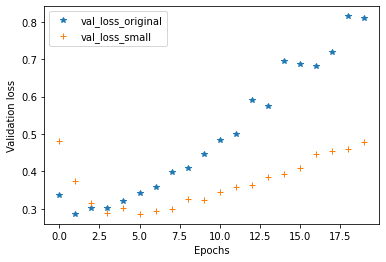

In [11]:
fig, ax = plt.subplots()
ax.plot(val_loss_original, '*', label=val_loss_original)
ax.plot(val_loss_small, '+',label= val_loss_small)
ax.set_xlabel("Epochs")
ax.set_ylabel("Validation loss")
ax.legend(['val_loss_original', 'val_loss_small'])

##### The original model overfits at epoche  = 2, and the smaller model overfits when epoch = 5

## Exercice 9 - Design a network that has much more capacity, far more than the problem would warrant

#### Call this model bigger model with two dense layers of size 512 and each followed with an activation function relu. Add a final layer of 1 node and an activation function of sigmoid. For your network compilation, define a rmsprop optimizer, with a binary crossentropy and acc as the metric

In [12]:
bigger_model = keras.models.Sequential()

bigger_model.add(keras.layers.Dense(512, activation = 'relu'))
bigger_model.add(keras.layers.Dense(512, activation = 'relu'))
bigger_model.add(keras.layers.Dense(1, activation = 'sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                        loss = 'binary_crossentropy', 
                        metrics=['acc'])

## Exercice 10 - Fit the bigger model 

#### Fit on the train set with the test set as the validation set, 20 epochs and batch size = 512 and save it in bigger hist

In [13]:
bigger_hist =bigger_model.fit(x_train_1, y_train_1, batch_size=512, epochs=20, validation_data=(x_test_1, y_test_1))

Epoch 1/20
49/49 [==============================] - 6s 113ms/step - loss: 0.4653 - acc: 0.7944 - val_loss: 0.3130 - val_acc: 0.8667
Epoch 2/20
49/49 [==============================] - 5s 101ms/step - loss: 0.2272 - acc: 0.9115 - val_loss: 0.2836 - val_acc: 0.8851
Epoch 3/20
49/49 [==============================] - 5s 103ms/step - loss: 0.1301 - acc: 0.9510 - val_loss: 0.3555 - val_acc: 0.8755
Epoch 4/20
49/49 [==============================] - 5s 101ms/step - loss: 0.0814 - acc: 0.9740 - val_loss: 0.3910 - val_acc: 0.8814
Epoch 5/20
49/49 [==============================] - 5s 103ms/step - loss: 0.0703 - acc: 0.9859 - val_loss: 0.4205 - val_acc: 0.8814
Epoch 6/20
49/49 [==============================] - 5s 103ms/step - loss: 0.0029 - acc: 0.9996 - val_loss: 0.6293 - val_acc: 0.8800
Epoch 7/20
49/49 [==============================] - 5s 103ms/step - loss: 0.1180 - acc: 0.9876 - val_loss: 0.6391 - val_acc: 0.8688
Epoch 8/20
49/49 [==============================] - 5s 106ms/step - loss: 8.

## Exercice 11 - Plot the bigger and original validation loss changing w.r.t epochs changing. 

#### Similar to exercise 8. How the bigger network loss changes regarding to the original network. The more capacity the network has, the quicker it will be able to model the training data, but if it converges quickly to 0, this is more susceptible for overfitting!

In [14]:
val_loss_bigg = bigger_hist.history['val_loss']

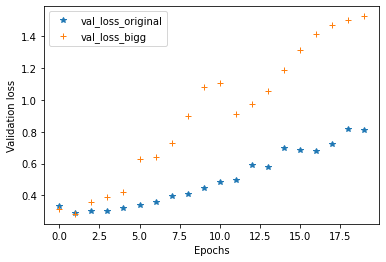

In [15]:
fig, ax = plt.subplots()
ax.plot(val_loss_original, '*', label=val_loss_original)
ax.plot(val_loss_bigg, '+',label= val_loss_bigg)
ax.set_xlabel("Epochs")
ax.set_ylabel("Validation loss")
ax.legend(['val_loss_original', 'val_loss_bigg'])

##### The bigger model overfits quicker, it never reduces

# Weight regularization

## Exercice 12 - Modify the original network 

#### Modify as l2 model by adding an L2 weight regularization to the model1. Add the L2 regularizers to the first two layers.

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [17]:
l2_model = keras.models.Sequential()

l2_model.add(keras.layers.Dense(16, activation = 'relu', activity_regularizer=tf.keras.regularizers.l2(0.01)))
l2_model.add(keras.layers.Dense(16, activation = 'relu', activity_regularizer=tf.keras.regularizers.l2(0.01)))
l2_model.add(keras.layers.Dense(1, activation = 'sigmoid'))

l2_model.compile(optimizer='rmsprop',
                        loss = 'binary_crossentropy', 
                        metrics=['acc'])

## Exercice 13 - Fit the model l2 on train set with previously presented parameters.

In [18]:
l2_hist =l2_model.fit(x_train_1, y_train_1, batch_size=512, epochs=20, validation_data=(x_test_1, y_test_1))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5186 - acc: 0.8210 - val_loss: 0.4219 - val_acc: 0.8778
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3477 - acc: 0.9096 - val_loss: 0.3690 - val_acc: 0.8750
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2755 - acc: 0.9318 - val_loss: 0.3374 - val_acc: 0.8861
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2327 - acc: 0.9465 - val_loss: 0.3436 - val_acc: 0.8778
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2011 - acc: 0.9585 - val_loss: 0.3522 - val_acc: 0.8750
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1749 - acc: 0.9676 - val_loss: 0.3587 - val_acc: 0.8734
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1561 - acc: 0.9734 - val_loss: 0.3920 - val_acc: 0.8600
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1342 - a

## Exe. 14 Plot the validation loss w.r.t epochs changing for original model and l2 model

#### Observe, the model with L2 regularization and see how it is more resistant to overfitting than the original model, even though both models have the same number of parameters.

In [19]:
val_loss_l2 = l2_hist.history['val_loss']

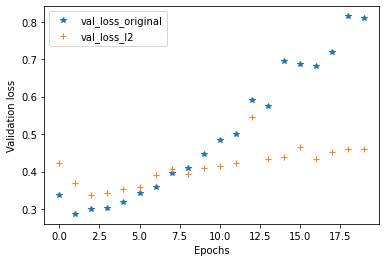

In [20]:
fig, ax = plt.subplots()
ax.plot(val_loss_original, '*', label=val_loss_original)
ax.plot(val_loss_l2, '+',label= val_loss_l2)
ax.set_xlabel("Epochs")
ax.set_ylabel("Validation loss")
ax.legend(['val_loss_original', 'val_loss_l2'])

###### from keras import regularizers
###### regularizers . l1 (0.001) // L1 regularization
###### regularizers . l1_l2 ( l1 =0.001 , l2 =0.001) // L1 and L2 regularization at the same time

# Adding Dropout

## Exercice 15 - Modify the original network by adding a dropout after each layer of 16 nodes. Name this model dpt model


In [21]:
dpt_model = keras.models.Sequential()

dpt_model.add(keras.layers.Dense(16, activation = 'relu'))
dpt_model.add(keras.layers.Dropout(0.5)) # 50% of nodes should be dropped for the following layer randomly

dpt_model.add(keras.layers.Dense(16, activation = 'relu'))
dpt_model.add(keras.layers.Dropout(0.5))

dpt_model.add(keras.layers.Dense(1, activation = 'sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                        loss = 'binary_crossentropy', 
                        metrics=['acc'])

## Exercice 16 - Fit the model on the set with previously presented parameters.

In [22]:
dpt_hist =dpt_model.fit(x_train_1, y_train_1, batch_size=512, epochs=20, validation_data=(x_test_1, y_test_1))

Epoch 1/20
49/49 [==============================] - 1s 29ms/step - loss: 0.6042 - acc: 0.6752 - val_loss: 0.4753 - val_acc: 0.8618
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4665 - acc: 0.8162 - val_loss: 0.3702 - val_acc: 0.8766
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3780 - acc: 0.8630 - val_loss: 0.3113 - val_acc: 0.8833
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3165 - acc: 0.8888 - val_loss: 0.2912 - val_acc: 0.8896
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2777 - acc: 0.9054 - val_loss: 0.2827 - val_acc: 0.8872
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2487 - acc: 0.9168 - val_loss: 0.2891 - val_acc: 0.8877
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2235 - acc: 0.9274 - val_loss: 0.3012 - val_acc: 0.8855
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2026 - a

## Exercice 17 - Plot the validation loss changing w.r.t the epochs changing for two original and dropout model

####  What are your observations? Do you see any improvement over the original network?

In [23]:
val_loss_dpt = dpt_hist.history['val_loss']

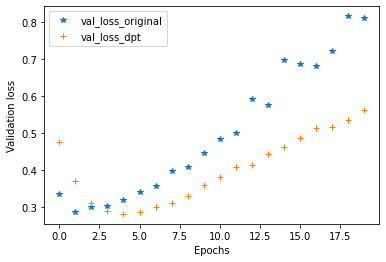

In [24]:
fig, ax = plt.subplots()
ax.plot(val_loss_original, '*', label=val_loss_original)
ax.plot(val_loss_dpt, '+',label= val_loss_dpt)
ax.set_xlabel("Epochs")
ax.set_ylabel("Validation loss")
ax.legend(['val_loss_original', 'val_loss_dpt'])

##### The dpt_model overfits at the epoch 4 when the original overfits at the epoch 2. We can say that the dpt_model is an improvement over the original netwotk

# Dataset 2

## Exercice 1 - Load House Price DataSet

##### The goal is to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. Load the boston housing dataset in train and test and check the data shape and sizes
##### The targets are the median values of owner-occupied homes, in thousands of dollars. Print them to check their data

In [25]:
( train_data , train_targets ) , ( test_data , test_targets ) = tf.keras.datasets.boston_housing.load_data()

In [26]:
print("SIZE")
print("train_data size:",train_data.size, "test_data size:",test_data.size)
print("train_labels size:",train_targets.size, "test_labels size:",test_targets.size)
print("\nSHAPE")

print("train_data shape:",train_data.shape, "test_data shape:",test_data.shape)
print("train_labels shape:",train_targets.shape, "test_labels shape:",test_targets.shape)

SIZE
train_data size: 5252 test_data size: 1326
train_labels size: 404 test_labels size: 102

SHAPE
train_data shape: (404, 13) test_data shape: (102, 13)
train_labels shape: (404,) test_labels shape: (102,)


In [27]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

Text(0.5, 1.0, 'Median values of owner-occupied homes, in $1 000')

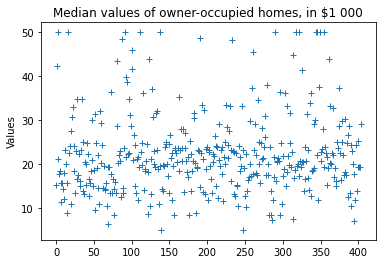

In [28]:
plt.plot(train_targets, "+")
plt.ylabel("Values")
plt.title("Median values of owner-occupied homes, in $1 000")

###### It goes from $1 000 to $50 000

## Exe. 2 Normalizing data 

##### For each feature in the input data (a column in the input data matrix), subtract the mean of the feature and divide by the standard deviation i.e. ∀x, x = (x−µ) / σ . In this way the feature is centered around 0 and has a unit standard deviation. 
##### Hint: use .mean(axis=0) and .std(axis=0) for computing mean and standard deviation.

In [29]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
print("mean:",mean, "\nstd:",std)

mean: [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01] 
std: [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [30]:
for i in range(13):
    for j in range(len(train_data)):
        train_data[j][i] = (train_data[j][i] - mean[i]) / std[i]

In [31]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

## Exercice 3 - Model definition 

##### Because so few samples are available, use a very small network with two hidden layers, each with 64 units and relu activation. To have a linear layer output, add a final layer with a single unit and no activation function. Compile the network with the mse ( mean squared error) loss function. Monitoring a new metric during training: mean absolute error ( mae ) 3. Finally define the optimizer = ’rmsprop’ in the model compilation. Define the model in a function named build model().

##### Notice In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting. Applying an activation function would constrain the range the output can take; for instance, if you applied a sigmoid activation function to the last layer,the network could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the network is free to learn to predict values in any range

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [33]:
def build_model () :
    model = models.Sequential ()

    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dense(1))

    model.compile(optimizer='rmsprop',
                        loss = 'mse', 
                        metrics=['mae'])
    return model

## Exercice 4 - Model Validation

##### To evaluate the network while we keep adjusting its parameters (such as the number of epochs used for training), we can split the data into a training set and a test set (here we name it as a validation set), as you did in machine learning examples. Because of few data points, the validation set would end up being very small (for instance, about 100 examples).
##### As a consequence, the validation scores might change a lot depending on which data points we chose to use for validation and which we chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating our model.
##### The best practice in such situations is to use K-fold cross-validation (see figure 2). It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K−1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained.

In [34]:
import numpy as np

In [35]:
k = 4
num_val_samples = len (train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
    print ('processing fold #', i )
    val_data = train_data [i * num_val_samples : ( i + 1) * num_val_samples ]
    val_targets = train_targets [i * num_val_samples : (i + 1) * num_val_samples ]
    
    partial_train_data = np.concatenate ([ train_data [: i * num_val_samples ], train_data [( i + 1) * num_val_samples :]] , axis=0)
    partial_train_targets = np.concatenate ([ train_targets [: i * num_val_samples ], train_targets [( i + 1) * num_val_samples :]] ,axis =0)
    
    model= build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    """ the following line is for evaluating the test set """
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [36]:
all_scores

[2.0431900024414062, 2.375586748123169, 2.580073356628418, 2.450376272201538]

## Exercice 5 - Print the overall score of your model and check its average

In [37]:
np.mean(all_scores)

2.362306594848633

Text(0.5, 1.0, 'Overall score')

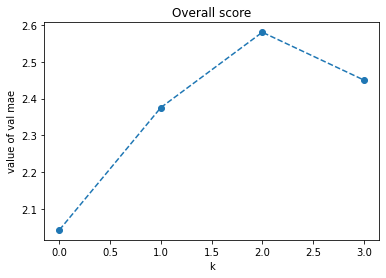

In [38]:
plt.plot(all_scores,'--o')
plt.xlabel("k")
plt.ylabel('value of val mae')
plt.title("Overall score")

## Exercice 6 - Now training the network a bit longer: 500 epochs

##### To keep a record of how well the model does at each epoch, we should modify the training loop to save the per-epoch validation score log. Modify the code from the previous exercise in order to save val mean absolute error after each epoch for any fold of cross validation. 

In [39]:
k = 4
num_val_samples = len (train_data)//k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print ('processing fold #', i )
    val_data = train_data [i * num_val_samples : ( i + 1) * num_val_samples ]
    val_targets = train_targets [i * num_val_samples : (i + 1) * num_val_samples ]
    
    partial_train_data = np.concatenate ([ train_data [: i * num_val_samples ], train_data [( i + 1) * num_val_samples :]] , axis=0)
    partial_train_targets = np.concatenate ([ train_targets [: i * num_val_samples ], train_targets [( i + 1) * num_val_samples :]] ,axis =0)
    
    model= build_model()
    history =  model.fit(partial_train_data , partial_train_targets , validation_data =( val_data , val_targets ) , epochs = num_epochs , batch_size =1 , verbose =0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


## Exercice 7 - Compute the average of the per-epoch mae scores for all folds

In [40]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [41]:
average_mae_history

[4.573754906654358,
 3.4749468564987183,
 3.0101593732833862,
 2.9047537446022034,
 2.7299124598503113,
 2.701132595539093,
 2.7762144207954407,
 2.6078320741653442,
 2.600783586502075,
 2.4744486808776855,
 2.596275269985199,
 2.5360938906669617,
 2.538826882839203,
 2.436959683895111,
 2.482665181159973,
 2.449303150177002,
 2.459681451320648,
 2.447714388370514,
 2.5256311893463135,
 2.420512408018112,
 2.3136329352855682,
 2.68901789188385,
 2.58932363986969,
 2.605937898159027,
 2.3933740854263306,
 2.2103640139102936,
 2.2618672847747803,
 2.305818259716034,
 2.5759031176567078,
 2.230708062648773,
 2.243033677339554,
 2.278561443090439,
 2.3175670206546783,
 2.377968579530716,
 2.1858763098716736,
 2.3936739563941956,
 2.357366979122162,
 2.3185432851314545,
 2.3449554443359375,
 2.201667219400406,
 2.276824653148651,
 2.302782267332077,
 2.3712044656276703,
 2.3045255541801453,
 2.276209533214569,
 2.236076235771179,
 2.2431683242321014,
 2.293169140815735,
 2.210101306438446,


## Exercice 8 - Plot the average of the per-epoch MAE scores w.r.t epochs changing. You should have a figure similar to 3

Text(0.5, 1.0, 'Validation MAE according to epochs ')

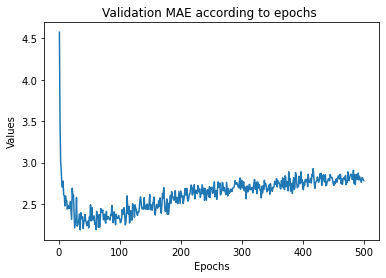

In [42]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Validation MAE according to epochs ')

## Exercice 9.a

##### - Omit the first 10 data points
##### - Replace each point with an exponential moving average of the previous points,to obtain a smooth curve i.e. point = previous point∗f actor+point∗(1−f actor) where factor is a value between 0 and 1
##### According to this plot, you can check when the validation MAE stops improving or becomes worst. Past the special point on the graph, the model starts overfitting.

In [43]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [44]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

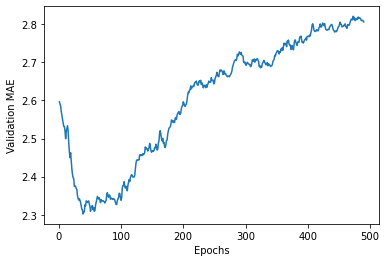

In [45]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

##### According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. After this point, we start overfitting.

## Exercice 9.b

##### Once we have finished tuning other parameters of the model (in addition to the number of epochs, we could also adjust the size of the hidden layers), we can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data

In [46]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 6042683.5000 - mae: 2405.1216


In [47]:
test_mae_score

2405.12158203125

##### We are still off by about $2400.

## Exercice 10

##### After finishing tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the hidden layers), train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data from the Exe. 1.

In [48]:
# def build_model_2 () :
#     model_2 = models.Sequential ()

#     model_2.add(keras.layers.Dense(32, activation = 'relu')) # 64-->32 
#     model_2.add(keras.layers.Dense(32, activation = 'relu'))
#     model_2.add(keras.layers.Dense(1))

#     model_2.compile(optimizer='rmsprop',
#                         loss = 'mse', 
#                         metrics=['mae'])
#     return model_2

In [49]:
# model1_exo1 = build_model()

# # Train it on the entirety of the data.
# model1_exo1.fit(x_train_1, y_train_1, epochs=80, batch_size=16, verbose=0)

# test_mse_score_exo1_model1, test_mae_score_exo1_model1 = model1_exo1.evaluate(x_test_1, y_test_1)

In [50]:
# model2_exo1 = build_model_2()

# # Train it on the entirety of the data.
# model2_exo1.fit(x_train_1, y_train_1, epochs=80, batch_size=16, verbose=0)

# test_mse_score_exo1_model2, test_mae_score_exo1_model2 = model2_exo1.evaluate(x_test_1, y_test_1)

In [51]:
# print("test_mae_score_exo1_model1 =",test_mae_score_exo1_model1, "test_mae_score_exo1_model2 =",test_mae_score_exo1_model2)

In [52]:
# if test_mae_score_exo1_model1<test_mae_score_exo1_model2:
#     print("model 1, with epoch=80 and hidden layer'units = 64, is better than the model 2")
# else:
#     print("model 2, with epoch=80 and hidden layer'units = 32, is better than the model 1")